# Merge and read csv_files

In [2]:
import pandas as pd
import glob
import os

# Path to your folder
folder_path = "../../csv_files"

# Find all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Read and concatenate all CSVs into one DataFrame
df = pd.concat((pd.read_csv(file) for file in csv_files), ignore_index=True)

# Keep only rows where Experiment == "SR"
df = df[df["Experiment"] == "SR"]

# Show the combined DataFrame
print(df.head())

     Name Experiment  Trial                       Sequence             Recall
80  julie         SR      1  q b x n t i l p y u e z h j k      q b x i t l n
81  julie         SR      2  b i p q d x z u o m j f v k s  b i p q d x z u o
82  julie         SR      3  j p e q o v r f d u g b a y t      j p x u o v r
83  julie         SR      4  n q y s a x u j k d o f e c t        n q y x a s
84  julie         SR      5  g j a s h u d i t l y k m n e    g j a s h i d l


In [3]:
df["points"] = 0   # initialize column
df["fails"] = [[] for _ in range(len(df))]  # initialize fails as empty lists

for idx, row in df.iterrows():
    seq = row["Sequence"].split()
    rec = row["Recall"].split()
    
    points = 0
    fails = []
    mistake_found = False
    
    for s, r in zip(seq, rec):
        if not mistake_found and s == r:
            points += 1
        elif s != r:
            fails.append((s, r))
            mistake_found = True  # lock the points counter
    
    # save results back into df
    df.at[idx, "points"] = points
    df.at[idx, "fails"] = fails

df.head(10)

,Name,Experiment,Trial,Sequence,Recall,points,fails
80,julie,SR,1,q b x n t i l p y u e z h j k,q b x i t l n,3,"[(n, i), (i, l), (l, n)]"
81,julie,SR,2,b i p q d x z u o m j f v k s,b i p q d x z u o,9,[]
82,julie,SR,3,j p e q o v r f d u g b a y t,j p x u o v r,2,"[(e, x), (q, u)]"
83,julie,SR,4,n q y s a x u j k d o f e c t,n q y x a s,3,"[(s, x), (x, s)]"
84,julie,SR,5,g j a s h u d i t l y k m n e,g j a s h i d l,5,"[(u, i), (i, l)]"
85,julie,SR,6,c m h s x e a l p u z k g f y,c m h s x e a,7,[]
86,julie,SR,7,q i z a t f g d u p n e c m v,q i z a t f,6,[]
87,julie,SR,8,s y j u h l f c a g m q e p k,s y j u k l f c,4,"[(h, k)]"
88,julie,SR,9,y g l p i m j t n e r u z h s,h g s p i m j c,0,"[(y, h), (l, s), (t, c)]"
89,julie,SR,10,q v x h d o s i l e g m k f j,q v x h d o,6,[]


# Confusion matrix

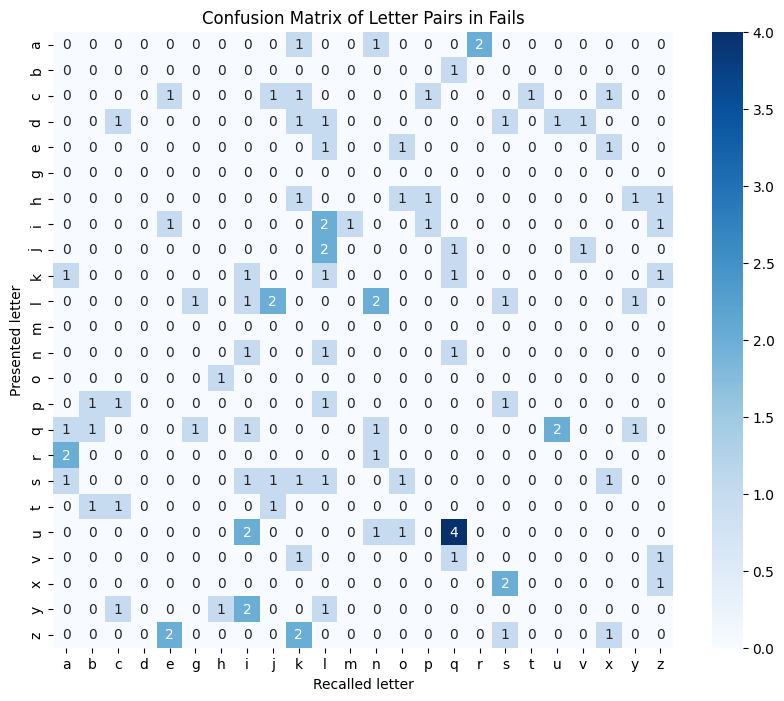

In [5]:
from collections import Counter
import seaborn as sns

import matplotlib.pyplot as plt

# Flatten all (s, r) pairs in fails column
all_fails = [pair for sublist in df["fails"] for pair in sublist]

# Count occurrences of each (s, r) pair
fail_counts = Counter(all_fails)

# Get sorted unique letters for axis labels
letters = sorted(set([s for s, _ in all_fails] + [r for _, r in all_fails]))

# Create confusion matrix DataFrame
conf_matrix = pd.DataFrame(0, index=letters, columns=letters)
for (s, r), count in fail_counts.items():
    conf_matrix.loc[s, r] = count

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Recalled letter")
plt.ylabel("Presented letter")
plt.title("Confusion Matrix of Letter Pairs in Fails")
plt.show()